<h1><center><b>Machine Learning</b></center></h1>

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

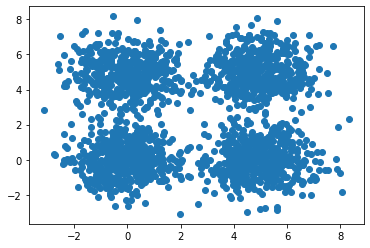

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:

from math import dist
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        
        ######## Helper fields #########
        self.X_fit_ = None     # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.
        self.iter = 0

    def fit(self, X):
      # store the dataset X
      self.X_fit_ = X
      # # Start with 4 random prototypes choosen from the data samples
      self.centroids = X[np.random.choice(len(X), self.n_clusters, replace = False)]

      for iter in range(self.max_iter):
        # Step 1 - Assign samples to closest prototypes
        self.labels_ = self._get_labels(X)
        # Save labels and centroids of this iteration
        self.labels_history.append(self.labels_)
        self.centroids_history.append(self.centroids)
        # Calculate the cost of this iteration
        cost = self._calculate_cost(X)
        self.costs.append(cost)
        # Step 2 - Update centroids
        self.centroids = self._get_centroids(X, self.labels_)
        # Check for convergence if the last prototype update is the same
        if np.array_equal(self.centroids, self.centroids_history[-1]):
          self.iter = iter
          break
    

    def predict(self, X):
      return self.labels_

    def _get_distances(self, X):
      # Calculate the distance between each point-sample in X and each centroid
      distances = np.sqrt(np.sum((X - self.centroids[:, np.newaxis])**2, axis=2))
      return distances

    def _get_labels(self, X):
      # calculate the distance to each prototype and choose the closest
      distances = self._get_distances(X)
      labels = np.argmin(distances, axis=0)
      return labels

    def _get_centroids(self, X, labels):
      centroids = np.zeros((self.n_clusters,self.X_fit_.shape[1]))
      # Update the prototype - 
      # calculate the mean of all samples assigned to each cluster
      for i in range(self.n_clusters):
        # get the cluster samples
        ind = np.where(labels == i)
        # calc the mean of cluster samples
        new_centroid = np.mean(X[ind], axis=0)
        # save to centroids array
        centroids[i] = new_centroid
      return centroids

    def _calculate_cost(self, X):
      distances= self._get_distances(X)
      labels = self.labels_
      cost = 0
      # Calculate the cost as the sum of the distances for each cluster.
      for i, centroid in enumerate(self.centroids):
        cluster = X[self.labels_ == i]
        cost += np.sum(distances[i, labels == i])
      return cost
    
    def plot(self):
      # return number of iterations
      return (self.labels_history, self.centroids, self.iter)




Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4 
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

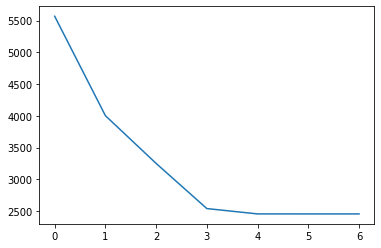

In [ ]:
costs = kmeans.costs
plt.plot(costs)
plt.show()

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5437.3437985980545<br>
3 clusters: 3930.127987883444<br>
4 clusters: 2474.24162727782<br>
6 clusters: 2214.361589219887<br>
8 clusters: 2034.8043877163973<br>
10 clusters: 1804.8279738749027<br>
20 clusters: 1343.5916475505603<br>

In [ ]:
opt_clusters = [2, 3, 4, 6, 8, 10, 20]
final_costs = []
for n_clusters in opt_clusters:
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  costs = kmeans.costs
  final_costs.append(costs[-1])

for cost in final_costs:
  print(cost)

5374.6301098284075
3884.2416165611257
2456.8934062796234
2217.492504714253
2029.8769729143394
1814.3953793421565
1331.4826688540907


Now write a code that plots the clusters and the locations of the centroids at each iteration

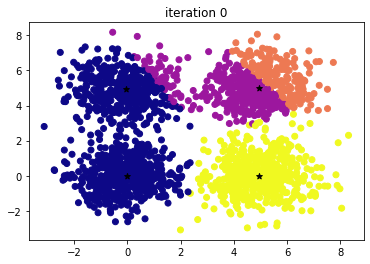

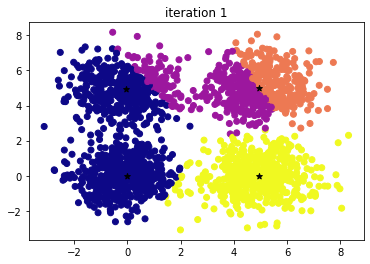

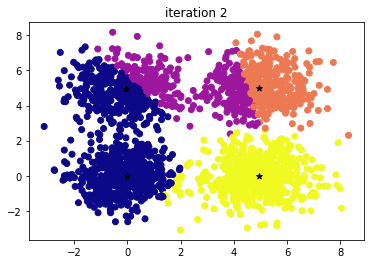

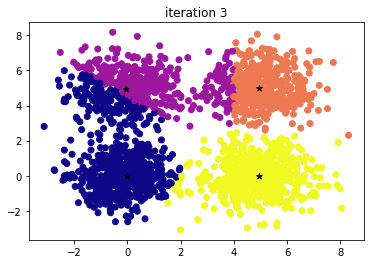

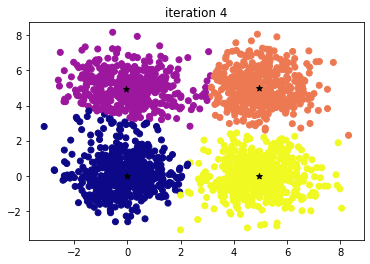

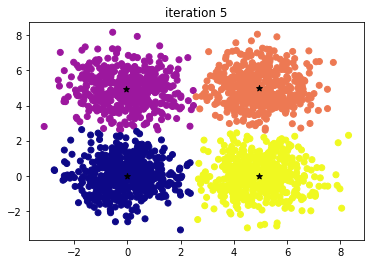

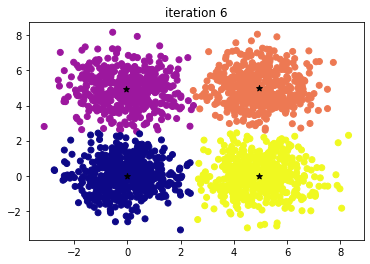

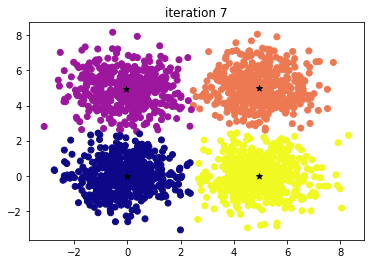

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
labels_history, centroids, iterations = kmeans.plot()

for i in range(iterations):
  x = X[:,0]
  y = X[:,1]
  # c-number of colors=labels of each iteration
  plt.scatter(x, y, c=labels_history[i], cmap='plasma')
  # display centroids as stars
  plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='black')
  plt.title(f"iteration {i}")
  plt.show()

## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
import numpy as np
class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
      # pre-process before PCA remove the mean from every sample in the dataset.
      # creating a new dataset with zero mean.
      # axis =0 corresponding to the rows-samples
      self.mean = np.mean(X, axis=0)
      X = X - self.mean

      # calculate the covariance matrix,
      # X is transposed because np.cov expects the samples to be the columns
      # and the rows to be the features.
      C = np.cov(X.T)

      # calculate eigenvalues and eigenvectors of the covariance matrix:
      values, vectors = np.linalg.eig(C)
      # use argsort to get the indexes of the sorted eigenvalues vector:
      idx = np.argsort(values)[::-1]
      values = values[idx]
      # sort the eigenvectors according to the largest eigenvalues
      vectors = vectors[:,idx]

      # save all the eigenvectors
      self.V = vectors
      return self.V

    def transform(self, X, n_dimentions):
      # the dimension reduction phase
      X = X - self.mean
      # choose the k largest eigenvectors according to the top k eigenvalues.
      # k = n_dimentions
      X_reduced = np.dot(X, self.V[:, :n_dimentions])
      return X_reduced.T


Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2).T

Plot the data in the top 2 principal component space.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


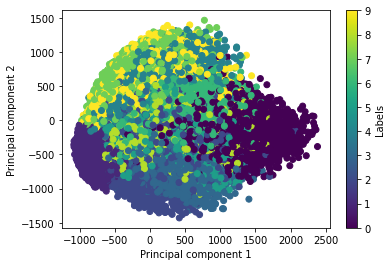

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

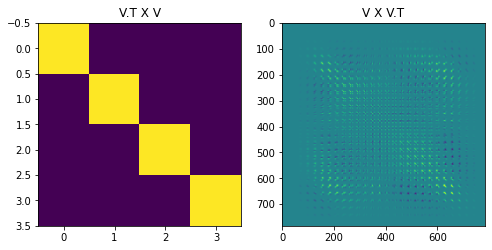

In [ ]:
# choose r<d
r = 4
pca = PCA()
V = pca.fit(X)
V = V[:, :r]
V_VT = np.real(np.dot(V,V.T))
VT_V = np.real(np.dot(V.T,V))

# plot the matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(VT_V)
ax1.set_title("V.T X V")
ax2.imshow(V_VT)
ax2.set_title("V X V.T")

plt.show()

Your Explanation:
If we choose r to be a lot smaller than d then the images will be very different that is because the V.T V matrix contains information about all the eigenvectors, each vector is orthogonal and that is why when we multiply vi.T row with vi will get 1 and 0 otherwise. the output matrix will be the identity matrix in the size of rXr.on the other hand V V.T matrix size is dXd. the matrix was constructed by multiplying features from partial eigenvectors, which is why as we increase r the images look more alike.


Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimentions):
  # PCA
  pca = PCA()
  V = pca.fit(X)
  # save the top eigenvectors of the covariance matrix for reconstruction
  V_reduced = V[:, :n_dimentions]
  print("original x shape", x.shape)
  # project the sample to n-dimentional space(dot(x,v_reduced by n_dimentions))
  X_reduced = pca.transform(x, n_dimentions).T
  print("reduced x shape", X_reduced.shape)
  # reconstruct the sample
  x_reconstructed = np.dot(X_reduced, V_reduced.T)
  print("reconstructed x shape", x_reconstructed.shape)
  # add the mean that was subtracted from the original sample
  x_reconstructed += np.mean(X, axis=0)
  return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


In [ ]:
# choose a random image from MNIST
random_img_index = np.random.choice(len(X))
random_img = X[random_img_index]
random_img = random_img.reshape(-1,1)
# transpose the image because V is (len(x),dim) and the image is (len(x),1)
random_img=random_img.T

reconstructed_images = []
dim_lst = [3,10,100]
for dim in dim_lst:
  reconstructed = pca_reconstruction(random_img, dim)
  # check if the reconstructed image is equal to the original
  print(np.array_equal(random_img, reconstructed))
  reconstructed_images.append((random_img, reconstructed))

original x shape (1, 784)
reduced x shape (1, 3)
reconstructed x shape (1, 784)
False
original x shape (1, 784)
reduced x shape (1, 10)
reconstructed x shape (1, 784)
False
original x shape (1, 784)
reduced x shape (1, 100)
reconstructed x shape (1, 784)
False


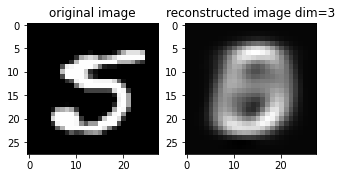

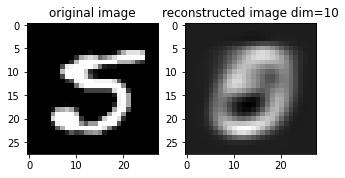

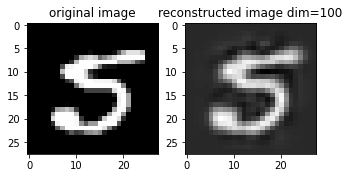

In [ ]:

for i in range(len(reconstructed_images)):
  # get images
  original_img = np.real(reconstructed_images[i][0])
  recon_img = np.real(reconstructed_images[i][1])

  # shape back to image
  original_img = np.array(original_img, dtype='float')
  pixels1 = original_img.reshape((28, 28))

  after_image = np.array(recon_img, dtype='float')
  pixels2 = after_image.reshape((28, 28))

  # plot
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
  # before
  plt.subplot(1,3,1)
  plt.imshow(pixels1, cmap='gray')
  plt.title(f'original image')
  # after
  plt.subplot(1,3,2)
  plt.imshow(pixels2, cmap='gray')
  plt.title(f'reconstructed image dim={dim_lst[i]}')